In [1]:
from nm_lib import nm_lib as nm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# JMS consider to add import scipy.optimize

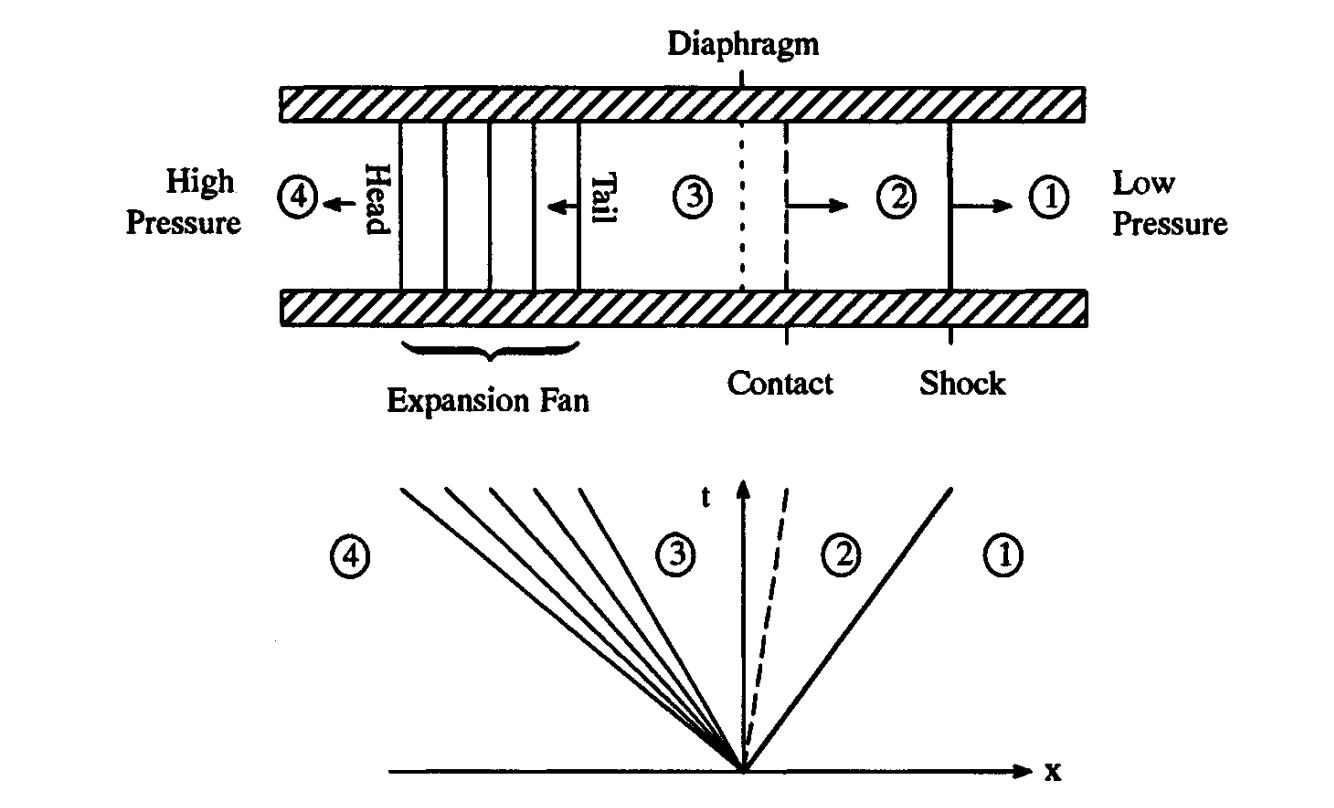

Expansion waves are acoustic waves.

 The boundary on the high-pressure side is called the head of the expansion.
Similarly, the boundary on the low-pressure side is called the tail of the expansion.
Head and tail are discontinous.

A centered expansion fan is an
expansion wave in which all characteristics originate from a single point in the x-t plane

For all characteristics in an expansion fan:
$$
\frac{dx}{dt} = u+a
$$
For tail $u=u_4$, for head $u=u_3$

Solution for velocity in expansion:
$$
u(x,t) = \frac{2}{\gamma+1}\left(\frac{x}{t}+\frac{\gamma-1}{2}u_4-a_4 \right)
$$
Speed of sound in exansion:
$$
a(x,t) = \frac{2}{\gamma+1}\left(\frac{x}{t}+\frac{\gamma-1}{2}u_4-a_4 \right) - \frac{x}{t}
$$

Pressure in expansion:
$$
p = p_4\left(\frac{a}{a_4} \right)^{2\gamma/(\gamma-1)}
$$

This holds for $b_1(t)\leq x \leq b_2(t)$, where the boundaries of the expansion $b_1, b_2$ are the characteristic lines $(b_1(t)-x_0)/t=u_4-a_4$ and $(b_2(t)-x_0)/t=u_3-a_3$.

In [2]:
# JMS OK
def get_cs(rho, P, gamma):
    return np.sqrt(gamma*P/rho)

""" SETTING INITIAL CONDITIONS """
gamma = 5/3
u4 = 0 #left
u1 = 0 #right
rho1 = 0.1 #right
rho4 = 1 #left
p1 = 0.1/gamma #right
p4 = 1/gamma #left

a4 = get_cs(rho4, p4, gamma)
a1 = get_cs(rho1, p1, gamma)

In [4]:
""" #NOT USED YET
def get_u_expansion_fan(x, t, gamma, u4, a4):
    return 2/(gamma+1) * (x/t + (gamma-1)/2 * u4 + a4)
    
def get_sound_speed_expansion_fan(x, t, gamma, u4, a4):
    return 2/(gamma+1) * (x/t + (gamma-1)/2 * u4 + a4) - x/t
    
def get_p_expansion_fan(p4, a, a4, gamma):
    return p4*(a/a4)**(2*gamma/(gamma-1))  
"""

# JMS I'm not sure what is get_ratio for, 
# instead of get_ratio, condiser the following: 
'''
def shock_tube_function(p4, p1, p5, rho1, rho5, gamma):
    """
    Shock tube equation
    """
    z = (p4 / p5 - 1.)
    c1 = get_cs(rho1, p1, gamma)
    c5 = get_cs(rho5, p5, gamma)
    
    gm1 = gamma - 1.
    gp1 = gamma + 1.
    g2 = 2. * gamma

    fact = gm1 / g2 * (c5 / c1) * z / np.sqrt(1. + gp1 / g2 * z)
    fact = (1. - fact) ** (g2 / gm1)

    return p1 * fact - p4
'''

def get_ratio(p2_over_p1_try, p1, p4, u1, u4, a1, a4, gamma):
    #eq(5.6)
    sqrt_term = np.sqrt((gamma+1)/(2*gamma) * (p2_over_p1_try - 1) + 1)
    bracket_term = u4 - u1 - (a1/gamma) * (p2_over_p1_try - 1)/sqrt_term
    rhs = p2_over_p1_try * (1 + (gamma-1)/(2*a4) * bracket_term)**(-2*gamma/(gamma-1))
    return p4/p1 - rhs


# JMS instead of doing that, consider to use scipy.optimize so you can use: 

"""
p4 = scipy.optimize.fsolve(shock_tube_function, p1, (p1, p5, rho1, rho5, gamma))[0]

"""

# and from here then you can get: 

"""
 # compute post-shock density and velocity
p4_p5 = (p4 / p5 - 1.)
c5 = get_cs(rho5, p5, gamma) 

gm1 = gamma - 1.
gp1 = gamma + 1.
gmfac1 = 0.5 * gm1 / gamma
gmfac2 = 0.5 * gp1 / gamma

fact = np.sqrt(1. + gmfac2 * z)

u4 = c5 * p4_p5 / (gamma * fact)
rho4 = rho5 * (1. + gmfac2 * p4_p5) / (1. + gmfac1 * p4_p5)

# shock speed
w = c5 * fact

# compute values at foot of rarefaction
p3 = p4
u3 = u4
rho3 = rho1 * (p3 / p1)**(1. / gamma)


"""

# JMS and for the positions: 

"""

    p1, rho1 = region1[:2]  # don't need velocity
    p3, rho3, u3 = region3
    c1 = get_cs(rho1, p1, gamma) 
    c3 = get_cs(rho3, p3, gamma) 
    
    if pl > pr:
        xsh = xi + w * t
        xcd = xi + u3 * t
        xft = xi + (u3 - c3) * t
        xhd = xi - c1 * t
    else:
        # pr > pl
        xsh = xi - w * t
        xcd = xi - u3 * t
        xft = xi - (u3 - c3) * t
        xhd = xi + c1 * t
 
"""

""" Trying p2/p1 to find smallest abs(p2/p1-rhs), this should be 0"""
smallest = np.inf
for p2_over_p1 in np.linspace(0.0005,100,1000):
    p2_over_p1_minus_rhs = get_ratio(p2_over_p1, p1, p4, u1, u4, a1, a4, gamma)
    if np.abs(p2_over_p1_minus_rhs) < smallest:
        smallest = p2_over_p1
        
p2 = smallest * p1

def get_u2(p1, p2, p4, u4, a4, gamma):
    #eq(3.55)
    return u4 + 2*a4/(gamma-1) * (1 - (p1*p2/(p4*p1))**((gamma-1)/(2*gamma)))

def get_a2(p2, p4, gamma):
    #eq(3.54)
    numerator = (gamma+1)/(gamma-1) + p2/p4
    denominator = 1 + (gamma+1)/(gamma-1) * p2/p4
    return a4 * np.sqrt(p2/p4 * numerator/denominator)

def get_a3(u3, u4, a4, gamma):
    #eq(5.2)
    return a4 + (u4-u3)*(gamma-1)/2

u2 = get_u2(p1, p2, p4, u4, a4, gamma)
a2 = get_a2(p2, p4, gamma)

shock_speed = u4 + a4 * np.sqrt((gamma-1)/(2*gamma) * (p4/p2 - 1) + 1) #eq(3.56)

u3 = u2
p3 = p2
a3 = get_a3(u3, u4, a4, gamma)

b1_characteristic = u4-a4
b2_characteristic = u3-a3

In [5]:
print(p1, p2, p3, p4) #p2 and p3 should not be so small??
print(u1, u2, u3, u4)
print(a1, a2, a3, a4)
print(b1_characteristic, b2_characteristic) #Both of these should be negative?!
print(shock_speed) #shock speed is way to high

0.06 3e-05 3e-05 0.6
0 2.586081101561635 2.586081101561635 0
1.0 0.014140810001499218 0.13797296614612153 1.0
-1.0 2.448108135415514
63.251877442491775


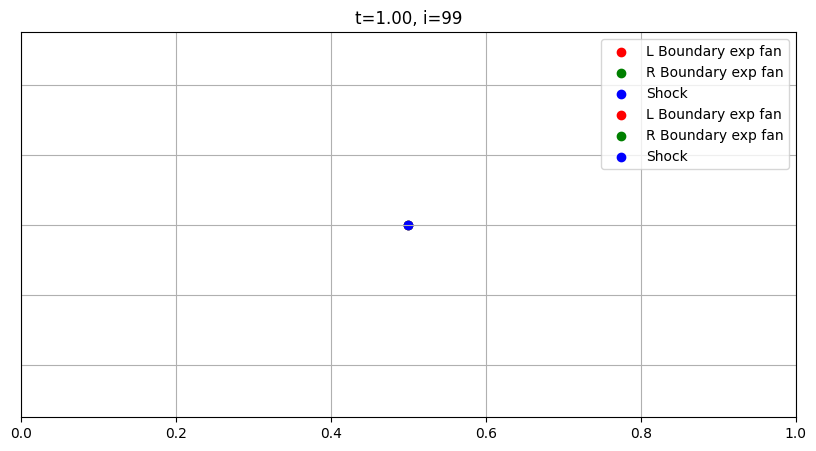

In [6]:
nt = 100
t = np.linspace(0,1, nt)
xx = np.linspace(0, 1, 100)
x0 = 0.5


def axes_pretty(axes):
    axes.set_xlim(0,1)
    axes.grid(True)
    axes.yaxis.set_ticklabels([])
    axes.yaxis.set_ticks_position('none')
    axes.legend(loc="upper right")

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
def init():    
    b1 = b1_characteristic*t[0] + x0 #left boundary of expansion fan (head)
    b2 = b2_characteristic*t[0] + x0 #right boundary of expansion fan (tail)
    shock_position = shock_speed*t[0] + x0
    
    
    axes.scatter(b1, 1, color="red", label="L Boundary exp fan")
    axes.scatter(b2, 1, color="green", label="R Boundary exp fan")
    axes.scatter(shock_position, 1, color="blue", label="Shock")
    
    axes_pretty(axes)


def animate(i):
    axes.clear()
    axes.set_title('t={:.2f}, i={:g}'.format(t[i],i))
    
    b1 = b1_characteristic*t[i] + x0 #left boundary of expansion fan (head)
    b2 = b2_characteristic*t[i] + x0 #right boundary of expansion fan (tail)
    shock_position = shock_speed*t[i] + x0
    
    axes.scatter(b1, 1, color="red", label="L Boundary exp fan")
    axes.scatter(b2, 1, color="green", label="R Boundary exp fan")
    axes.scatter(shock_position, 1, color="blue", label="Shock")
    
    axes_pretty(axes)


anim = FuncAnimation(fig, animate, interval=50, frames=nt, init_func=init)
HTML(anim.to_jshtml())

# STOP

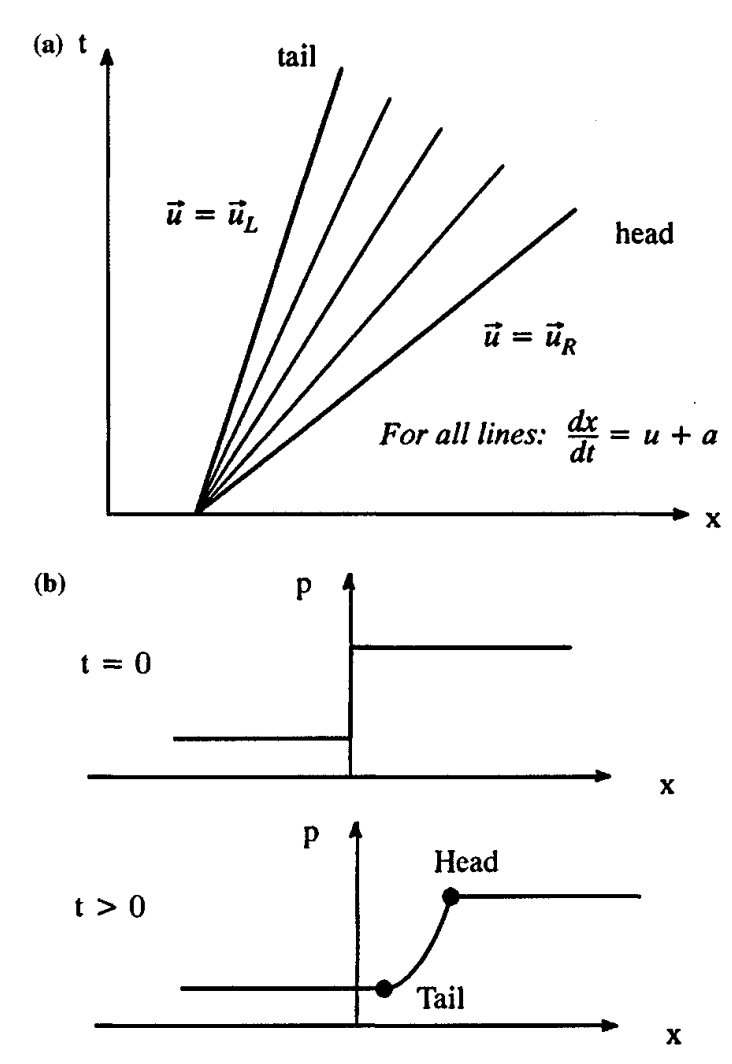

In [ ]:
def get_radio(x, y, u1, u4, a1, a4, gamma):
    #here x is the unknown p2/p1
    #and y is the known p4/p1
    return y - x * (\
             1 + (gamma-1)/(2*a4) * (u4 - u1 - (a1/gamma)*((x - 1)/(np.sqrt((gamma+1)/(2*gamma)*(x-1))+1)))\
            )**(-2*gamma/(gamma-1))

def get_cs(gamma, P, rho):
    #sound speed
    return np.sqrt(gamma*P/rho)

gamma = 5/4
u1 = 0
u4 = 0
p1 = 1
p4 = 0.1
rho1 = 1
rho4 = 0.1
a1 = get_cs(gamma, p1, rho1)
a4 = get_cs(gamma, p4, rho4)

x0 = 1.0
from scipy.optimize import fsolve

try_x = np.linspace(0.1,10, 100)

x = fsolve(lambda x: get_radio(x, p4/p1, u1, u4, a1, a4, gamma), x0)

print(x)

def compute_p3():
    # Implement a root-finding method here to solve for p3
    pass
"""
def sod_solution(x, t):
    # Compute the speed of sound in region 1
    a1 = np.sqrt(gamma*p1/rho1)

    # Compute the speed of the head of the expansion fan
    # This will involve the solution for p3
    a_head = ...

    # Compute the speed of the contact discontinuity
    # This will involve the solution for p3 and u3
    s_contact = ...

    # Compute the speed of the shock
    # This will involve the solution for p3, u3, and rho3
    s_shock = ...

    # Determine the location of the shock and contact discontinuity
    x1 = x0 - a1*t
    x2 = x0 + a_head*t
    x3 = x0 + s_contact*t
    x4 = x0 + s_shock*t
    
    # Compute the solution for each region
    if x < x1:
        # Compute state 1 (unexpanded fluid)
        pass
    elif x1 <= x < x2:
        # Compute state 2 (expanded fluid)
        pass
    elif x2 <= x < x3:
        # Compute state 3 (behind the contact discontinuity)
        pass
    elif x3 <= x < x4:
        # Compute state 3 (shocked fluid)
        pass
    else:
        # Compute state 4 (unshocked fluid)
        pass
"""

# Q

Q: What's wrong with analytical solution?

Q: How to plot "analytical" Alfven speed, since B field is constantly changing.

# Analytical sod shock tube testing

In [ ]:
def get_radio(x, y, u1, u4, a1, a4, gamma):
    #here x is the unknown p2/p1
    #and y is the known p4/p1
    return y - x * (\
             1 + (gamma-1)/(2*a4) * (u4 - u1 - (a1/gamma)*((x - 1)/(np.sqrt((gamma+1)/(2*gamma)*(x-1))+1)))\
            )**(-2*gamma/(gamma-1))

def get_aR(x, t, uR):
    return uR - x/t

def get_aL(x, t, uL):
    return uL - x/t

def get_u(x, t, gamma, uL, aL):
    return 2/(gamma+1) * (x/t + (gamma-1)/2 * uL + aL)

def get_a(x, t, gamma, uL, uR, aL, aR):
    return 2/(gamma+1) * (x/t + (gamma-1)/2 * uL + aL) - x/t
    


uL = 0
uR = 0

pL = 1
pR = 0

xx = np.linspace(0,1,100)

aL = get_aL(xx, 0.2, uL)
aR = get_aR(xx, 0.2, uR)
a = get_a(xx, 0.2, 5/4, uL, uR, aL, aR)
u = get_u(xx, 0.2, 5/4, uL, aL)

def func(x):
    y = pR/pL
    return get_radio(x, y, uL, uR, aL, aR, 5/4)



In [ ]:
#https://en.wikipedia.org/wiki/Sod_shock_tube
#states
#I: Left Unperturbed Region
#II: Left Expanding Region (also known as the Rarefaction Wave or the Expansion Fan)
#III: Contact Discontinuity (also known as the Contact Surface)
#IV: Right Compressed Region (also known as the Shocked Gas Region)
#V: Right Unperturbed Region

def get_cs(gamma, P, rho):
    #sound speed
    return np.sqrt(gamma*P/rho)

def get_Gamma(gamma):
    return (gamma-1)/(gamma+1)

def get_beta(gamma):
    return (gamma-1)/(2*gamma)

def get_rho4(P5, P4, rho5, gamma):
    Gamma = get_Gamma(gamma)
    return rho5 * (P4 + Gamma*P5)/(P5 + Gamma*P4)

#P4=P3, this is needed for rho4
#m is for marked
def get_u4(gamma, P3m, P5, rhoR):
    Gamma = get_Gamma(gamma)
    return (P3m - P5) * np.sqrt((1-Gamma)/(rhoR*(P3m+Gamma*P5)))

def u3_iteration(gamma, P1, P3m, rhoL):
    beta = get_beta(gamma)
    Gamma = get_Gamma(gamma)
    return (P1**beta-P3m**beta)*np.sqrt((1-Gamma**2)*P1**(1/gamma)/(Gamma**2 * rhoL))

#this is then used to find a P3m that gives u3=u4 as close as possible and call that P3
#u3 and u4 needs to be calculated iteratively to find u4=u3
#then
def get_u3(u5, P3, P5, rho5, gamma):
    return u5 + (P3-P5)/np.sqrt(rho5/2 * ((gamma+1)*P3 + (gamma-1)*P5))

def get_rho3(rho1, P3, P1, gamma):
    #adiabatic gas law
    return rho1 * (P3/P1)**(1/gamma)

#https://physics.stackexchange.com/questions/423758/how-to-get-exact-solution-to-sod-shock-tube-test
def get_u2(x, xmid, t, c1, gamma):
    return 2/(gamma+1) *(c1 + (x-xmid)/t)

def get_rho2(rho1, gamma, u2, c1):
    return rho1 * (1 - (gamma-1)/2 * u2/c1)**(2/(gamma-1))

def get_P2(P1, gamma, u2, c1):
    return P1 * (1-(gamma-1)/2 * u2/c1)**(2*gamma/(gamma-1))

def analytical_sod(PL, PR, rhoL, rhoR, uL, uR, t):
    x1 = np.arange(0, 1/5, 1e-2)
    x2 = np.arange(1/5, 2/5, 1e-2)
    x3 = np.arange(2/5, 3/5, 1e-2)
    x4 = np.arange(3/5, 4/5, 1e-2)
    x5 = np.arange(4/5, 5/5, 1e-2)
    
    xmid = 0.5
    
    c1 = get_cs(gamma, PL, rhoL)
    c5 = get_cs(gamma, PR, rhoR)
    
    P1 = PL
    rho1 = rhoL
    u1 = uL
    
    u2 = get_u2(x2, xmid, t, c1, gamma)
    P2 = get_P2(P1, gamma, u2, c1)
    rho2 = get_rho2(rho1, gamma, u2, c1)
    
    P5 = PR
    rho5 = rhoR
    u5 = uR
    
    P3try = np.arange(0, 0.3, 1e-3)
    min_abs = np.infty
    best_index = -1
    for i in range(len(P3try)):
        P3m = P3try[i]
        u3m = u3_iteration(gamma, P1, P3m, rhoL)
        u4m = get_u4(gamma, P3m, P5, rhoR)
        abs_val = np.abs(u3m-u4m)
        if (abs_val < np.infty):
            min_abs = abs_val
            best_index = i

    P3 = P3try[best_index]
    rho3 = get_rho3(rho1, P3, P1, gamma)
    u3 = get_u3(u5, P3m, P5, rho5, gamma)
    
    u4 = u3
    P4 = P3
    rho4 = get_rho4(P5, P4, rho5, gamma)
    
    rho1 *= np.ones(len(x1))
    rho3 *= np.ones(len(x3))
    rho4 *= np.ones(len(x4))
    rho5 *= np.ones(len(x5))
    
    u1 *= np.ones(len(x1))
    u3 *= np.ones(len(x3))
    u4 *= np.ones(len(x4))
    u5 *= np.ones(len(x5))
    
    P1 *= np.ones(len(x1))
    P3 *= np.ones(len(x3))
    P4 *= np.ones(len(x4))
    P5 *= np.ones(len(x5))
    
    xx = np.concatenate((x1,x2,x3,x4,x5))
    rho = np.concatenate((rho1,rho2,rho3,rho4,rho5))
    P = np.concatenate((P1,P2,P3,P4,P5))
    u = np.concatenate((u1,u2,u3,u4,u5))
    return xx, rho, P, u
    

        
gamma = 5/4
PL = 1
PR = 0.125
rhoL = 1
rhoR = 0.125
uL = 0
uR = 0

xx, rho, P, u = analytical_sod(PL, PR, rhoL, rhoR, uL, uR, t=0.3)
plt.plot(xx, rho, label="rho")
plt.legend()

**Continuity equation**

$$ \frac{\partial \rho}{\partial t} + \nabla \cdot (\rho \bf u) = 0 $$


**Conservation of momentum**
$$ \frac{\partial \rho {\bf u}}{\partial t} + \nabla \cdot (\rho {\bf u} \otimes {\bf u}) = - \nabla (P_g)$$


**Conservation of energy**
$$ \frac{\partial e}{\partial t } = -\nabla\cdot e {\bf u} -P_g \nabla \cdot {\bf u}$$

We only do the derivatives in the x-direction as this field is 1D giving that $\nabla=(\partial/\partial x)\hat{i}$.

Then we get the **continuity equation**:

$$ \frac{\partial\rho}{\partial t}= - \frac{\partial\rho u_x}{\partial x}  $$

The **conservation of momentum**:

$$ \frac{\partial \rho\mathbf{u}}{\partial t} = - \left(\frac{\partial\rho u_x^2}{\partial x}
                                                    + \frac{\partial P_g}{\partial x}\right)\mathbf{\hat{i}}
                                                - \frac{\partial\rho u_x u_y}{\partial x}\mathbf{\hat{j}}
                                                - \frac{\partial\rho u_x u_z}{\partial x}\mathbf{\hat{k}}$$


The **conservation of energy**:

$$ \frac{\partial e}{\partial t } = -\frac{\partial eu_x}{\partial x}-P_g\frac{\partial u_x}{\partial x} $$

# Hydro Solver class

In [ ]:
class HydroSolver1D():
    def __init__(self, nx):
        self.nx = nx
        self.xx = np.linspace(0, 1, nx)
        
        self.rho = np.zeros(nx)
        self.u = np.zeros((nx,3))
        self.e = np.zeros(nx)
        self.Pg = np.zeros(nx)
        
        self.gamma = 5/3
        self.check_intital_conditions()
        self.calculate_inital_conditions()

    def check_intital_conditions(self):
        assert hasattr(self, "calculate_inital_conditions"), "You need to define a function called calculate_inital_conditions"

    def get_sound_speed(self):
        #ideal gas assumption
        cs = np.sqrt(self.gamma * self.Pg/self.rho)
        return cs
    
    def lax(self, var, rhs, dt):
        hh = 1/3 *  (np.roll(var, -1) + var + np.roll(var, +1)) + rhs * dt
        #remove ill calculated points
        hh = hh[1:-1]
        #padding
        hh = np.pad(hh, pad_width=[1,1] ,mode="edge")
        return hh
    
    
    def update_rho(self, dt): 
        rho = self.rho
        ux = self.u[:,0]

        rhs = -nm.deriv_cent(self.xx, rho*ux)
        hh = self.lax(rho, rhs, dt)
        return hh
    
    def update_ux(self, rho, dt):
        Pg = self.Pg
        ux = self.u[:,0]
        
        rhs = -nm.deriv_cent(self.xx, rho*ux*ux) - nm.deriv_cent(self.xx, Pg)
        hh = self.lax(rho*ux, rhs, dt)
        return hh/rho
    
    def update_uy(self, rho, ux, dt):
        uy = self.u[:,1]
        
        rhs = - nm.deriv_cent(self.xx, rho*ux*uy)
        hh = self.lax(rho*uy, rhs, dt)
        return hh/rho
    
    def update_uz(self, rho, ux, dt):
        uz = self.u[:,2]
        
        rhs = - nm.deriv_cent(self.xx, rho*ux*uz)
        hh = self.lax(rho*uz, rhs, dt)
        return hh/rho   

    def update_e(self, ux, dt):
        e = self.e
        Pg = self.Pg

        rhs = - nm.deriv_cent(self.xx, e*ux) - Pg*nm.deriv_cent(self.xx, ux)
        hh = self.lax(e, rhs, dt)
        return hh

    def calculate_dt(self, cfl_cut):
        #cfl condition
        cs = self.get_sound_speed()
        dt1 = cfl_cut * nm.cfl_adv_burger(np.abs(self.u[:,0])+cs, self.xx)
        dt2 = cfl_cut * nm.cfl_adv_burger(cs, self.xx)
        return np.min([dt1, dt2])

    def step(self, cfl_cut):
        dt = self.calculate_dt(cfl_cut)

        rho = self.update_rho(dt)
        ux = self.update_ux(rho, dt)
        uy = self.update_uy(rho, ux, dt)
        uz = self.update_uz(rho, ux, dt)
        e = self.update_e(ux, dt)
        
        self.rho = rho
        self.u[:,0] = ux
        self.u[:,1] = uy
        self.u[:,2] = uz
        self.e = e
        
        self.Pg = (self.gamma-1) * self.e / self.rho
        
        return dt
    
    def solve(self, nt, cfl_cut=0.6):
        nx = self.nx
        rho = np.zeros((nt, nx))
        P = np.zeros((nt, nx))
        ux = np.zeros((nt,nx))
        uy = np.zeros((nt,nx))
        uz = np.zeros((nt,nx))
        e = np.zeros((nt,nx))
        cs = np.zeros((nt,nx))
        rho[0][:] = self.rho
        P[0][:] = self.Pg
        e[0][:] = self.e
        ux[0][:] = self.u[:,0]
        uy[0][:] = self.u[:,1]
        uz[0][:] = self.u[:,2]
        cs[0][:] = self.get_sound_speed()
        
        t = np.zeros(nt)

        for i in range(1, nt):
            dt = self.step(cfl_cut=cfl_cut)
            rho[i][:] = self.rho
            P[i][:] = self.Pg
            ux[i][:] = self.u[:,0]
            uy[i][:] = self.u[:,1]
            uz[i][:] = self.u[:,2]
            e[i][:] = self.e
            t[i] = t[i-1] + dt
            cs[i][:] = self.get_sound_speed()
        return rho, P, e, ux, uy, uz, t, cs

# Functions for plotting 2 subplots with sound speed

In [ ]:
def set_axvline_sound_speed_propagation(sound_speed, t, middle_xx, ax, label=False):
    pos = middle_xx + t * sound_speed
    if (sound_speed >0 and pos > 1):
        pos = 1
    if (sound_speed <0 and pos < 0):
        pos = 0
    if label==None:
        ax.axvline(pos, linestyle="--", color="red")
    else: 
        ax.axvline(pos, linestyle="--", color="red", label="$x=x_0+c_st$")        

In [ ]:
def get_anim_with_sound_speed(xx, cs, t, ax0_var, ax0_label, ax1_var, ax1_label, fig, ax, ylim_ax0=(0,1.1), ylim_ax1=(0,0.65), ax_loc=None):
    middle_xx = xx[len(xx)//2]
    cs_start_middle = cs[0][len(xx)//2]

    def init():
        ax[0].plot(xx, ax0_var[0,:], label=ax0_label)
        ax[1].plot(xx, ax1_var[0,:], label=ax1_label)
        set_axvline_sound_speed_propagation(cs_start_middle, t[0], middle_xx, ax[0], label=True)
        set_axvline_sound_speed_propagation(-cs_start_middle, t[0], middle_xx, ax[0])
        set_axvline_sound_speed_propagation(cs_start_middle, t[0], middle_xx, ax[1])
        set_axvline_sound_speed_propagation(-cs_start_middle, t[0], middle_xx, ax[1])
        ax[0].legend(loc=ax_loc)
        ax[1].legend(loc=ax_loc)
        ax[0].set_ylim(ylim_ax0)
        ax[1].set_ylim(ylim_ax1)

    def animate(i):
        ax[0].clear()
        ax[1].clear()
        ax[0].plot(xx, ax0_var[i,:], label=ax0_label)
        ax[1].plot(xx, ax1_var[i,:], label=ax1_label)

        set_axvline_sound_speed_propagation(cs_start_middle, t[i], middle_xx, ax[0], label=True)
        set_axvline_sound_speed_propagation(-cs_start_middle, t[i], middle_xx, ax[0])
        set_axvline_sound_speed_propagation(cs_start_middle, t[i], middle_xx, ax[1])
        set_axvline_sound_speed_propagation(-cs_start_middle, t[i], middle_xx, ax[1])
        ax[0].legend(loc=ax_loc)
        ax[1].legend(loc=ax_loc)
        ax[0].set_ylim(ylim_ax0)
        ax[1].set_ylim(ylim_ax1)

    return init, animate

# Sod shock tube test with tan smoothed discontinuous point 

In [ ]:
def interval_shift(x,a,b,c,d):
    #shifts [a,b] onto [c,d] for interval x
    return c + (d-c)/(b-a) *(x-a)

In [ ]:
def calculate_inital_conditions(self):
    self.rho[:int(self.nx/2)] = 0.125
    self.rho[int(self.nx/2):] = 1
    
    self.Pg[:int(self.nx/2)] = 0.125/self.gamma
    self.Pg[int(self.nx/2):] = 1/self.gamma
    
    #smoothing middle with tangens
    smooth_left = 0.48
    smooth_right = 0.52
    
    smooth_starpoint = np.argmin(np.abs(self.xx-smooth_left))
    smooth_endpoint = np.argmin(np.abs(self.xx-smooth_right))
    
    mapped_xx = interval_shift(self.xx[smooth_starpoint:smooth_endpoint], smooth_left, smooth_right, -np.pi/4, np.pi/4)
    
    tan_func = np.tan(mapped_xx)
    
    pressure = interval_shift(tan_func, np.min(tan_func), np.max(tan_func), 0.125/self.gamma, 1/self.gamma)
    
    self.Pg[smooth_starpoint:smooth_endpoint] = pressure
    
    density = interval_shift(tan_func, np.min(tan_func), np.max(tan_func), 0.125, 1)

    self.rho[smooth_starpoint:smooth_endpoint] = density

    self.e = self.Pg / (self.gamma-1) * self.rho

HydroSolver1D.calculate_inital_conditions = calculate_inital_conditions

nx = 1000
hd = HydroSolver1D(nx)

nt = 1000

plot_points = 100

rho, P, e, ux, uy, uz, t, sound_speed = hd.solve(nt)
xx = hd.xx

fig, ax = plt.subplots(nrows=2, figsize=(10, 5))
init, animate = get_anim_with_sound_speed(xx, sound_speed, t, rho, "rho", P, "P", fig, ax)
anim = FuncAnimation(fig, animate, interval=100, frames=np.linspace(0, nt - 1, plot_points, endpoint=False, dtype=int), init_func=init)
HTML(anim.to_jshtml())

# Without smoothing

In [ ]:
def calculate_inital_conditions(self):
    self.rho[:int(self.nx/2)] = 0.125
    self.rho[int(self.nx/2):] = 1
    
    self.Pg[:int(self.nx/2)] = 0.125/self.gamma
    self.Pg[int(self.nx/2):] = 1/self.gamma
    
    self.e = self.Pg / (self.gamma-1) * self.rho

HydroSolver1D.calculate_inital_conditions = calculate_inital_conditions

nx = 1000
hd = HydroSolver1D(nx)

nt = 1000

plot_points = 100

rho, P, e, ux, uy, uz, t, sound_speed = hd.solve(nt)
xx = hd.xx

fig, ax = plt.subplots(nrows=2, figsize=(10, 5))
init, animate = get_anim_with_sound_speed(xx, sound_speed, t, rho, "rho", P, "P", fig, ax)
anim = FuncAnimation(fig, animate, interval=100, frames=np.linspace(0, nt - 1, plot_points, endpoint=False, dtype=int), init_func=init)
HTML(anim.to_jshtml())

# Plotting gaussian pertubation

In [ ]:
def gaussian(x, mean, std_dev):
    """
    Calculate the Gaussian function value for given x, mean, and standard deviation.

    :param x: The point at which to evaluate the Gaussian function
    :param mean: The mean of the Gaussian distribution
    :param std_dev: The standard deviation of the Gaussian distribution
    :return: The value of the Gaussian function at x
    """
    exponent = -((x - mean)**2) / (2 * std_dev**2)
    return (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(exponent)

Test gaussian multiplied with equal large value in rho and Pg, to check for shock in Pg

In [ ]:
def calculate_inital_conditions(self):
    middle = int(len(self.xx)/2)
    gauss = gaussian(self.xx, self.xx[middle], std_dev=0.01)
    gauss = gauss/np.max(gauss)
    self.rho = 0.001 * gauss + 1
    self.Pg = 0.001 * gauss + 1
    self.e = self.Pg / (self.gamma-1) * self.rho

HydroSolver1D.calculate_inital_conditions = calculate_inital_conditions

nx = 300
nt = 500
plot_points = 50

hd_g = HydroSolver1D(nx)

rho_g, P_g, e_g, ux_g, uy_g, uz_g, t_g, sound_speed_g = hd_g.solve(nt)
xx_g = hd_g.xx

fig, ax = plt.subplots(nrows=2, figsize=(10, 5))
init, animate = get_anim_with_sound_speed(xx_g, sound_speed_g, t_g, rho_g, "rho", P_g, "P", fig, ax, ylim_ax0=None, ylim_ax1=None, ax_loc="upper right")
anim = FuncAnimation(fig, animate, interval=100, frames=np.linspace(0, nt - 1, plot_points, endpoint=False, dtype=int), init_func=init)
HTML(anim.to_jshtml())

**Continuity equation** and **convervation of energy** stays the same.

**Conservation of momentum**
$$ \frac{\partial \rho {\bf u}}{\partial t} + \nabla \cdot (\rho {\bf u} \otimes {\bf u}) = - \nabla (P_g)
                                            +\mathbf{J}\times \mathbf{B},$$
                                            
where $\mathbf{J}=\mathbf{\nabla}\times\mathbf{B}$.

We first solve $\mathbf{J}$:

$$\mathbf{J} =\frac{\partial}{\partial x}\mathbf{\hat{i}}\times\mathbf{B} 
             =-\frac{\partial B_z}{\partial x}\mathbf{\hat{j}}+\frac{\partial B_y}{\partial x}\mathbf{\hat{k}}.$$
             
Then $\mathbf{J}\times \mathbf{B}$ becomes:

$$\mathbf{J}\times \mathbf{B} = -\left( B_z\frac{\partial B_z}{\partial x} + B_y\frac{\partial B_y}{\partial x} \right)\mathbf{\hat{i}} + B_x\frac{\partial B_y}{\partial x}\mathbf{\hat{j}}  + B_x\frac{\partial B_z}{\partial x}\mathbf{\hat{k}}.$$

Adding this to what we found in the HD case gives:

$$ \frac{\partial \rho\mathbf{u}}{\partial t} = - \left(\frac{\partial\rho u_x^2}{\partial x}
                                                    + \frac{\partial P_g}{\partial x}\right)\mathbf{\hat{i}}
                                                - \frac{\partial\rho u_x u_y}{\partial x}\mathbf{\hat{j}}
                                                - \frac{\partial\rho u_x u_z}{\partial x}\mathbf{\hat{k}}
                                                -\left( B_z\frac{\partial B_z}{\partial x} + B_y\frac{\partial B_y}{\partial x} \right)\mathbf{\hat{i}} + B_x\frac{\partial B_y}{\partial x}\mathbf{\hat{j}}  + B_x\frac{\partial B_z}{\partial x}\mathbf{\hat{k}}
                                                $$
                                                
$$
\frac{\partial \rho\mathbf{u}}{\partial t} = - \left(\frac{\partial\rho u_x^2}{\partial x}
                                                    + \frac{\partial P_g}{\partial x}
                                                    + B_z\frac{\partial B_z}{\partial x} + B_y\frac{\partial B_y}{\partial x} \right)\mathbf{\hat{i}}+
                                                    \left(B_x\frac{\partial B_y}{\partial x}- \frac{\partial\rho u_x u_y}{\partial x}\right)\mathbf{\hat{j}}  
                                                    +\left(B_x\frac{\partial B_z}{\partial x}- \frac{\partial\rho u_x u_z}{\partial x}\right)\mathbf{\hat{k}}
$$

**Ideal induction equation**:

$$
\frac{\partial\mathbf{B}}{\partial t} = \mathbf{\nabla}\times\left(\mathbf{u}\times \mathbf{B}\right)
$$

$$
\frac{\partial\mathbf{B}}{\partial t} = \left( \frac{\partial u_yB_x}{\partial x}-\frac{\partial u_x B_y}{\partial x}\right)\mathbf{\hat{j}}
+ \left(\frac{\partial u_x B_z}{\partial x} - \frac{\partial u_z B_x}{\partial x}  \right)\mathbf{\hat{k}}
$$

# MHD class

In [ ]:
class MDHsolver1D(HydroSolver1D):
    def __init__(self, nx):
        self.nx = nx
        self.xx = np.linspace(0, 1, nx)
        
        self.rho = np.zeros(nx)
        self.u = np.zeros((nx,3))
        self.e = np.zeros(nx)
        self.Pg = np.zeros(nx)
        self.B = np.zeros((nx,3))
        
        self.gamma = 5/3
        self.check_intital_conditions()
        self.calculate_inital_conditions()
        
    def update_ux(self, rho, dt):
        ux = self.u[:,0]
        Pg = self.Pg
        By = self.B[:,1]
        Bz = self.B[:,2]
        
        deriv_B =  Bz*nm.deriv_cent(self.xx, Bz) + By*nm.deriv_cent(self.xx, By)
        
        rhs = -nm.deriv_cent(self.xx, rho*ux*ux) - nm.deriv_cent(self.xx, Pg) - deriv_B
        
        hh = self.lax(rho*ux, rhs, dt)
        return hh/rho
    
    def update_uy(self, rho, ux, dt):
        uy = self.u[:,1]
        Bx = self.B[:,0]
        By = self.B[:,1]

        rhs = - nm.deriv_cent(self.xx, rho*ux*uy) + Bx * nm.deriv_cent(self.xx, By)
        
        hh = self.lax(rho*uy, rhs, dt)
        return hh/rho
    
    def update_uz(self, rho, ux, dt):
        rho = self.rho
        uz = self.u[:,2]
        Bx = self.B[:,0]
        Bz = self.B[:,2]

        rhs = - nm.deriv_cent(self.xx, rho*ux*uz) + Bx * nm.deriv_cent(self.xx, Bz)
        
        hh = self.lax(rho*uz, rhs, dt)
        return hh/rho  
    
    def update_Bx(self, dt):
        return self.B[:,0]
    
    def update_By(self, ux, uy, Bx, dt):
        By = self.B[:,1]

        rhs = -nm.deriv_cent(self.xx, By*ux) + nm.deriv_cent(self.xx, Bx*uy)
        
        hh = self.lax(By, rhs, dt)
        return hh
    
    def update_Bz(self, ux, uz, Bx, dt):
        Bz = self.B[:,2]
        rhs = nm.deriv_cent(self.xx, ux*Bz) - nm.deriv_cent(self.xx, uz*Bx)
        
        hh = self.lax(Bz, rhs, dt)
        return hh    
    
    def step(self, cfl_cut):
        dt = self.calculate_dt(cfl_cut)
        
        rho = self.update_rho(dt)
        
        ux = self.update_ux(rho, dt)
        uy = self.update_uy(rho, ux, dt)
        uz = self.update_uz(rho, ux, dt)
        self.e = self.update_e(ux, dt)
        
        Bx = self.update_Bx(dt)
        By = self.update_By(ux, uy, Bx, dt)
        Bz = self.update_Bz(ux, uz, Bx, dt)
        
        self.rho = rho
        self.u[:,0] = ux
        self.u[:,1] = uy
        self.u[:,2] = uz
        self.B[:,0] = Bx
        self.B[:,1] = By
        self.B[:,2] = Bz
        
        self.Pg = (self.gamma-1) * self.e / self.rho
        
        return dt
    
    def get_alfven_speed(self, Bx, By, Bz):
        mu0 = 1.25663706212*1e-6
        B = np.sqrt(Bx[0]*Bx[0] + By[0]*By[0] + Bz[0]*Bz[0])
        vA = B/np.sqrt(mu0*self.rho)
        c = self.get_sound_speed()
        return vA/np.sqrt(1+(vA*vA)/(c*c))

    def apply_wave(self, wave, wave_dir, t):
        if isinstance(wave(self.xx, t), float):
            if wave_dir=="x":
                self.B[0,0] = wave(self.xx, t)
            if wave_dir=="y":
                self.B[0,1] = wave(self.xx, t)
            if wave_dir=="z":
                self.B[0,2] = wave(self.xx, t)
            
        else:
            if wave_dir=="x":
                self.B[:,0] = wave(self.xx, t)
            if wave_dir=="y":
                self.B[:,1] = wave(self.xx, t)
            if wave_dir=="z":
                self.B[:,2] = wave(self.xx, t)
    
    def solve(self, nt, wave=None, wave_dir=None, cfl_cut=0.6):
        nx = self.nx
        
        rho = np.zeros((nt, nx))
        Pg = np.zeros((nt, nx))
        #print(Pg.shape, self.Pg.shape)
        ux = np.zeros((nt,nx))
        uy = np.zeros((nt, nx))
        uz = np.zeros((nt, nx))
        e = np.zeros((nt,nx))
        cs = np.zeros((nt,nx))
        v_alfven = np.zeros((nt,nx))

        Bx = np.zeros((nt,nx))
        By = np.zeros((nt,nx))
        Bz = np.zeros((nt,nx))
        
        if wave:
            self.apply_wave(wave, wave_dir, 0)
            
        
        rho[0][:] = self.rho
        Pg[0][:] = self.Pg
        e[0][:] = self.e
        ux[0][:] = self.u[:,0]
        uy[0][:] = self.u[:,1]
        uz[0][:] = self.u[:,2]
        cs[0][:] = self.get_sound_speed()
        
        Bx[0][:] = self.B[:,0]
        By[0][:] = self.B[:,1]
        Bz[0][:] = self.B[:,2]
        
        v_alfven[0][:] = self.get_alfven_speed(Bx[0], By[0], Bz[0])
        
        t = np.zeros(nt)

        for i in range(1, nt):
            dt = self.step(cfl_cut=cfl_cut)
            #print(i, self.Pg.shape)
            rho[i][:] = self.rho
            Pg[i][:] = self.Pg
            ux[i][:] = self.u[:,0]
            uy[i][:] = self.u[:,1]
            uz[i][:] = self.u[:,2]
            e[i][:] = self.e
            t[i] = t[i-1] + dt
            if wave:
                self.apply_wave(wave, wave_dir, t[i])
            Bx[i][:] = self.B[:,0]
            By[i][:] = self.B[:,1]
            Bz[i][:] = self.B[:,2] 
            
            cs[i][:] = self.get_sound_speed()
            v_alfven[i][:] = self.get_alfven_speed(Bx[i], By[i], Bz[i])
        return rho, P, e, ux, uy, uz, Bx, By, Bz, t, cs, v_alfven

# Plotting functions

In [ ]:
def get_anim_mhd(fig, ax, xx, t, var0, var0_label, var1, var1_label):
    def init():
        ax[0].set_title(f"t=: {t[0]:.2f}")
        ax[0].plot(mhd.xx, var0[0,:], label=var0_label)
        ax[1].plot(mhd.xx, var1[0,:], label=var1_label)
        ax[0].set_ylim(-1,1)
        ax[0].legend()
        ax[1].legend()

    def animate(i):
        ax[0].clear()
        ax[1].clear()
        ax[0].set_title(f"t=: {t[i]:.2f}")
        ax[0].plot(mhd.xx, var0[i,:], label=var0_label)
        ax[1].plot(mhd.xx, var1[i,:], label=var1_label)
        ax[0].set_ylim(-1,1)
        ax[0].legend()
        ax[1].legend()
        
    return init, animate

# Trying standing wave

In [ ]:
def calculate_inital_conditions(self):
    self.rho[:] = 1
    self.B[:,0] = 1
    #even with an ocillating Bx-field as long as the rest of the plasma is at rest there is no
    #change in the other B-fields
    self.u[:,:] = 1

    self.Pg[:] = 1/self.gamma
    self.e = self.Pg / (self.gamma-1) * self.rho

def wave(xx, t):
    freq = 10
    amp = 0.2
    return amp*np.cos(2*np.pi*freq*t) * np.sin(np.pi * xx/0.5)    

MDHsolver1D.calculate_inital_conditions = calculate_inital_conditions

nx = 100
mhd = MDHsolver1D(nx)

nt = 100
plot_points = 80

rho, Pg, e, ux, uy, uz, Bx, By, Bz, t, cs, v_alfven = mhd.solve(nt, wave, "y")

fig, ax = plt.subplots(nrows=2, figsize=(10, 5))
init, animate = get_anim_mhd(fig, ax, mhd.xx, t, By, "By", uy, "uy")

anim = FuncAnimation(fig, animate, interval=100, frames=np.linspace(0, nt - 1, plot_points, endpoint=False, dtype=int), init_func=init)
HTML(anim.to_jshtml())

# Trying to produce Alfven waves

In [ ]:
def calculate_inital_conditions(self):
    self.rho[:] = 1
    self.B[:,0] = 1
    self.u[:,:] = 1

    self.Pg[:] = 1/self.gamma
    self.e = self.Pg / (self.gamma-1) * self.rho

MDHsolver1D.calculate_inital_conditions = calculate_inital_conditions

def point_wave(xx, t):
    freq = 30
    amp = 0.8
    return amp*np.cos(2*np.pi*freq*t)

nx = 1000
mhd = MDHsolver1D(nx)
nt = 300

rho, Pg, e, ux, uy, uz, Bx, By, Bz, t, cs, v_alfven = mhd.solve(nt, point_wave, "y")

fig, ax = plt.subplots(nrows=2, figsize=(10, 5))
init, animate = get_anim_mhd(fig, ax, mhd.xx, t, By, "By", uy, "uy")
anim = FuncAnimation(fig, animate, interval=100, frames=nt, init_func=init)
HTML(anim.to_jshtml())

Increase resolution -> Less damping
Figure out how to compute damping
Include dissipation into energy term. Try to derive expression. Bring diffusion term into energy eq (produces heating). Try to figure out how much heating dissipates into energy.